In [ ]:
from ultralytics import YOLO
import pandas as pd
import os
import shutil

In [ ]:
model = YOLO("yolov8n.yaml")
results = model.train(data='/kaggle/input/experiments/database.csv', epochs=1)

In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/experiments/database.csv")
df.head()
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_name       2180 non-null   object
 1   gpo-v6           1743 non-null   object
 2   zebra-other-v5   1485 non-null   object
 3   zebra-other-v7   2180 non-null   object
 4   gpo-v1           380 non-null    object
 5   image_path       2180 non-null   object
 6   gpo_labels_path  1989 non-null   object
 7   zo_labels_path   1989 non-null   object
 8   zo_labels        1989 non-null   object
 9   gpo_labels       1989 non-null   object
 10  kaggle_path      2180 non-null   object
dtypes: object(11)
memory usage: 187.5+ KB


In [ ]:
df['gpo-v6'].isna().sum()

437

In [ ]:
df['gpo-v6'].value_counts(normalize=True)

gpo-v6
train    0.703959
test     0.148594
val      0.147447
Name: proportion, dtype: float64

In [ ]:
# n=50
# image_paths = df['kaggle_path'].head(n).tolist()
# len(image_paths)

path = '/experiments/images/'
# for path in path:
if os.path.isfile(path):
    print('True')

In [ ]:
import cv2 as cv
from PIL import Image
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
!mkdir -p /kaggle/working/images/train
!mkdir -p /kaggle/working/images/val
!mkdir -p /kaggle/working/labels/val
!mkdir -p /kaggle/working/labels/train

In [ ]:
for timg in train_img:
    if timg in val_img:
        print(timg)

get split from dataset

In [ ]:
yaml = '/the-yaml-data/damn.yaml'
dest = '/working/data.yaml'
shutil.copy(yaml, dest)

'/kaggle/working/data.yaml'

In [ ]:
images_path = '/experiments/images/'

images = [f for f in os.listdir(images_path) if f.endswith(('.png','.jpg', '.jpeg', '.svg'))]
print(f"{len(images)} images")

263 images


In [ ]:
images_path = '/experiments/images/'

images = [f for f in os.listdir(images_path) if f.endswith(('.png','.jpg', '.jpeg', '.JPG'))]

train_img, val_img = train_test_split(images, test_size=0.2, random_state =42)

for image in train_img:
    shutil.copy(os.path.join(images_path, image), '/images/train')
for image in  val_img:
    shutil.copy(os.path.join(images_path, image), '/images/val/')

print(f"Copied {len(train_img)} images to train and {len(val_img)} images to val.")

Copied 1744 images to train and 436 images to val.


In [ ]:
missing = df['gpo_labels'].isna().sum()
print(f"Missing: {missing}")

Missing: 191


In [ ]:
df['gpo_labels'].head()
label_train = '/labels/train/'
label_val = '/labels/val/'

train_df = df[df['image_name'].isin(train_img)]
val_df = df[df['image_name'].isin(val_img)]


#creating label files
def saveLabels(dataframe, label_path):
    skipped_count = 0
    for index, row in dataframe.iterrows():
        image_name = row['image_name']
        labels = row['gpo_labels']

        if pd.isna(labels):
            skipped_count+=1
            continue
        else:
            labels=str(labels)

        label_file = os.path.splitext(image_name)[0] + '.txt'

        with open(os.path.join(label_path, label_file), 'w') as f:
            f.write(labels)
    print("Skipping")
    print(f"Skipped {skipped_count} labels")

saveLabels(train_df, label_train)
saveLabels(val_df, label_val)

print(f"Labels created!")

Skipping
Skipped 147 labels
Skipping
Skipped 44 labels
Labels created!


In [ ]:
label_train = '/kaggle/working/labels/train/'
label_val = '/kaggle/working/labels/val/'
image_train = '/kaggle/working/images/train/'
image_val = '/kaggle/working/images/val/'

def moveLabel(image_path, label_path):
    for image in os.listdir(image_path):
        if image.endswith(('.jpg', '.png', '.jpeg', '.JPG')):
            name = os.path.splitext(image)[0]
            label_file = name + '.txt'

            label_path_train = os.path.join(label_train, label_file)
            label_path_val = os.path.join(label_val, label_file)

            if os.path.exists(label_path_train) and image_path == image_val:
                shutil.move(label_path_train, os.path.join(label_path, label_file))
            if os.path.exists(label_path_val) and image_path == image_train:
                shutil.move(label_path_val, os.path.join(label_path, label_file))
moveLabel(image_train, label_train)
moveLabel(image_val, label_val)
print("Labels moved")

Labels moved


In [ ]:
yaml = '/kaggle/input/the-yaml-data/damn.yaml'
dest = '/kaggle/working/data.yaml'
shutil.copy(yaml, dest)

'/kaggle/working/data.yaml'

In [ ]:
f = open('data.yaml', 'r')
print(f.read())

path: /kaggle/working/
train: /kaggle/working/images/train
val: /kaggle/working/images/val
nc: 3
names: ['grevy', 'plains', 'other']


In [ ]:
model = YOLO("yolov8n.yaml")

results = model.train(data="data.yaml", epochs=30, lr0=0.001, patience=29, optimizer='SGD', augment=True)

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=30, time=None, patience=29, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

wandb: Currently logged in as: j-leegitau (j-leegitau-dsail). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /kaggle/working/labels/train.cache... 1597 images, 147 backgrounds, 0 corrupt: 100%|██████████| 1744/1744 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/labels/val.cache... 392 images, 44 backgrounds, 0 corrupt: 100%|██████████| 436/436 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.39G      3.415      4.318       4.23         45        640: 100%|██████████| 109/109 [00:22<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]


                   all        436        746    0.00243      0.475     0.0051    0.00186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.32G       3.46      4.172      4.089         48        640: 100%|██████████| 109/109 [00:20<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]


                   all        436        746    0.00286        0.5     0.0287    0.00815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.45G      3.448      4.133      4.001         54        640: 100%|██████████| 109/109 [00:20<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]


                   all        436        746     0.0218     0.0316     0.0104    0.00316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.31G      3.472      4.072      3.952         73        640: 100%|██████████| 109/109 [00:20<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]


                   all        436        746    0.00717     0.0634    0.00829    0.00262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.31G      3.418      4.032       3.92         55        640: 100%|██████████| 109/109 [00:20<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.24it/s]


                   all        436        746      0.366       0.07     0.0242    0.00544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.31G      3.369      3.878      3.881         59        640: 100%|██████████| 109/109 [00:20<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]


                   all        436        746     0.0296      0.135     0.0266    0.00724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.39G      3.279      3.748        3.8         54        640: 100%|██████████| 109/109 [00:20<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]


                   all        436        746      0.128      0.187     0.0653     0.0174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.28G      3.171      3.659      3.708         65        640: 100%|██████████| 109/109 [00:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.77it/s]


                   all        436        746      0.124      0.235     0.0764     0.0221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.34G      3.108      3.562      3.604         61        640: 100%|██████████| 109/109 [00:20<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.80it/s]


                   all        436        746      0.563      0.251      0.171      0.047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.3G      3.006      3.427      3.487         77        640: 100%|██████████| 109/109 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.59it/s]


                   all        436        746       0.63      0.189      0.167     0.0525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.3G      2.936      3.309      3.426         60        640: 100%|██████████| 109/109 [00:20<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]


                   all        436        746      0.277      0.218      0.207     0.0733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.3G      2.849      3.178      3.344         45        640: 100%|██████████| 109/109 [00:20<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]


                   all        436        746      0.707      0.247      0.272      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.32G      2.781      3.092      3.261         61        640: 100%|██████████| 109/109 [00:20<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.22it/s]


                   all        436        746      0.396      0.321      0.249     0.0958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.3G      2.712      3.013      3.194         71        640: 100%|██████████| 109/109 [00:20<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]


                   all        436        746      0.298      0.378        0.3      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.31G       2.64       2.89      3.131         46        640: 100%|██████████| 109/109 [00:21<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]


                   all        436        746      0.444      0.372      0.315      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.28G      2.563       2.84      3.065         56        640: 100%|██████████| 109/109 [00:20<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]


                   all        436        746       0.42      0.356      0.317      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.31G      2.484      2.819      3.017         82        640: 100%|██████████| 109/109 [00:20<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]


                   all        436        746      0.379      0.392      0.332      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.3G       2.48      2.755      2.959         77        640: 100%|██████████| 109/109 [00:19<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.69it/s]


                   all        436        746      0.389      0.386       0.36      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.31G      2.449      2.701       2.92         46        640: 100%|██████████| 109/109 [00:20<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.46it/s]


                   all        436        746      0.419      0.392       0.35      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.31G      2.406      2.665      2.888         42        640: 100%|██████████| 109/109 [00:20<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.72it/s]


                   all        436        746      0.393      0.422      0.369      0.166
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.26G      2.243      3.056      2.838         28        640: 100%|██████████| 109/109 [00:20<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.67it/s]


                   all        436        746       0.42      0.426      0.407      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.26G      2.199      2.902      2.802         24        640: 100%|██████████| 109/109 [00:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.58it/s]


                   all        436        746      0.476       0.44      0.429      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.26G      2.198      2.827      2.777         41        640: 100%|██████████| 109/109 [00:19<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]


                   all        436        746      0.463      0.431      0.417      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.28G      2.178      2.813       2.76         13        640: 100%|██████████| 109/109 [00:19<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.85it/s]


                   all        436        746      0.515      0.419      0.426      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.28G      2.128      2.756      2.744         26        640: 100%|██████████| 109/109 [00:19<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]


                   all        436        746      0.551      0.414      0.435      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.29G      2.132      2.745       2.73         32        640: 100%|██████████| 109/109 [00:19<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.67it/s]


                   all        436        746      0.486       0.44       0.43      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       2.3G      2.099      2.726      2.691         30        640: 100%|██████████| 109/109 [00:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]


                   all        436        746      0.517      0.442      0.445       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.26G      2.095      2.688        2.7         33        640: 100%|██████████| 109/109 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.81it/s]


                   all        436        746       0.48      0.455      0.443      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.3G      2.102      2.663      2.678         21        640: 100%|██████████| 109/109 [00:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.53it/s]


                   all        436        746      0.535      0.433      0.458      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.26G      2.087      2.656      2.665         23        640: 100%|██████████| 109/109 [00:19<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.50it/s]


                   all        436        746      0.512      0.451      0.461      0.225

30 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 186 layers, 2,684,953 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]


                   all        436        746      0.658      0.382      0.468      0.256
                 grevy         62         81      0.704      0.691      0.706      0.411
                plains         67        119      0.557      0.286      0.372      0.204
                 other        268        546      0.712      0.168      0.326      0.155
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▁▁▁▁▁▂▂▄▃▄▅▅▅▆▆▆▆▆▆▇▇▇▇█▇████
metrics/mAP50-95(B),▁▁▁▁▁▁▁▂▂▂▃▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇█
metrics/precision(B),▁▁▁▁▅▁▂▂▇▇▄█▅▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆█
metrics/recall(B),██▁▁▂▃▃▄▄▃▄▄▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█████▇▇▆▆▆▅▅▅▄▄▃▃▃▃▃▂▂▂▁▁▁▁▁▁▁


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
shutil.make_archive('/kaggle/working/yolo_results', 'zip', '/kaggle/working/runs')

'/kaggle/working/yolo_results.zip'


image 1/1 /kaggle/input/mugie-experiments/images/AdobeStock_133974086_Preview.jpeg: 448x640 1 grevy, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


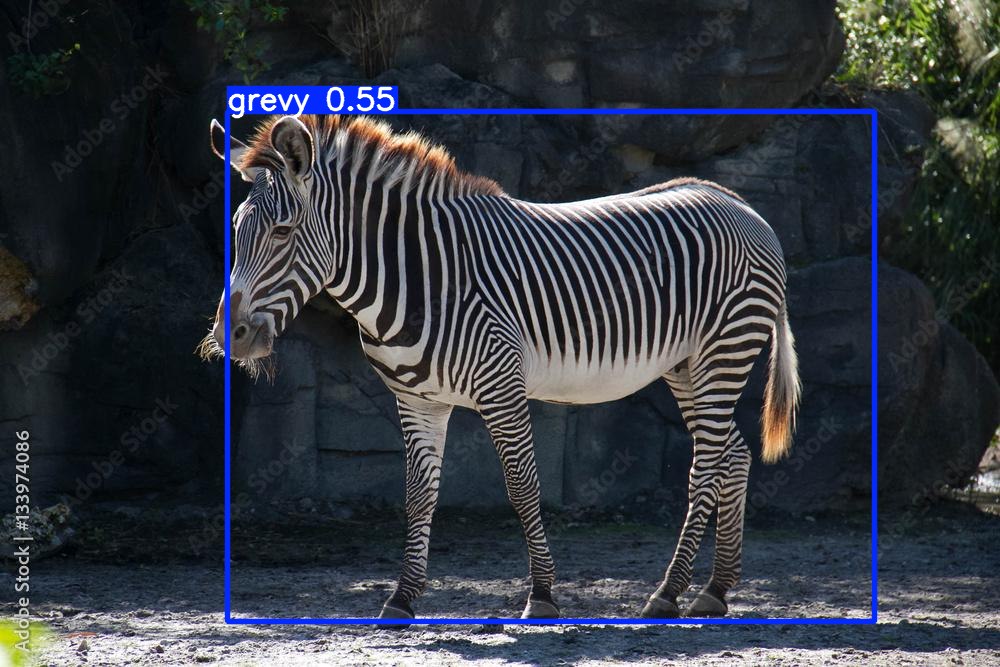

In [ ]:
model = '/kaggle/working/runs/detect/train2/weights/best.pt'
model = YOLO(model)

results = model.predict(source="/kaggle/input/mugie-experiments/images/AdobeStock_133974086_Preview.jpeg")
Result = results[0]
plot = results[0].plot()
plot = cv.cvtColor(plot, cv.COLOR_BGR2RGB)
display(Image.fromarray(plot))